In [1]:
import pandas as pd
import numpy as np

import statistics as stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
data = pd.read_csv('MPB-Dataset_Clean.csv')

In [4]:
data.head(5)

,target,municipality,street,listing_type,kitchen_type,building_condition,postcode,double_glazing,swimming_pool,dining_room,laundry_room,basement,air_conditioning,floor,m2,bathrooms,toilets,shower_rooms,number_bedrooms,primary_energy_consumption,co2_emission
0,780,Other,Other,Apartment,Installed,Good,1190,Yes,No,No,No,No,No,2.0,128,1,1.0,1,1,0,0
1,1350,uccle,Other,Apartment,Installed,Good,Other,No,No,No,No,No,No,3.0,90,1,1.0,1,2,0,0
2,1280,Other,Other,Apartment,Hyper equipped,Good,1040-1060-1000-1150-1160,Yes,No,Yes,Yes,Yes,No,3.0,90,1,1.0,1,2,242,52
3,1100,woluwe,Other,Apartment,Installed,Good,Other,Yes,No,No,No,Yes,No,3.0,75,1,1.0,1,2,542,109
4,1040,Other,Other,Apartment,Hyper equipped,Good,1040-1060-1000-1150-1160,No,No,Yes,No,No,No,4.0,70,1,1.0,1,1,0,0


In [5]:
data.shape

(3240, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   target                      3240 non-null   int64  
 1   municipality                3240 non-null   object 
 2   street                      3240 non-null   object 
 3   listing_type                3240 non-null   object 
 4   kitchen_type                3240 non-null   object 
 5   building_condition          3240 non-null   object 
 6   postcode                    3240 non-null   object 
 7   double_glazing              3240 non-null   object 
 8   swimming_pool               3240 non-null   object 
 9   dining_room                 3240 non-null   object 
 10  laundry_room                3240 non-null   object 
 11  basement                    3240 non-null   object 
 12  air_conditioning            3240 non-null   object 
 13  floor                       3240 

In [7]:
data_cat = data.select_dtypes(include = object)
data_num = data.select_dtypes(include = np.number)

In [8]:
data_cat_target = data.select_dtypes(include = object)
data_cat_target['target'] = data['target']

# Plot Settings

In [9]:
# sns.set_style("whitegrid")
sns.set_style("white")
# sns.set_style("dark")

# sns.color_palette()
# sns.color_palette("rocket", as_cmap=True)
sns.color_palette("rocket")

plt.figure(figsize = (6, 3))

<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

# Plots - Numericals

In [10]:
# sns.pairplot(data_num)

In [11]:
# def catplot(df):
#     for column in df.columns:
#         sns.catplot(df, x=column, y='target', palette='deep')
#     return None

In [12]:
# catplot(data_num)

In [13]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   target                      3240 non-null   int64  
 1   floor                       3240 non-null   float64
 2   m2                          3240 non-null   int64  
 3   bathrooms                   3240 non-null   int64  
 4   toilets                     3240 non-null   float64
 5   shower_rooms                3240 non-null   int64  
 6   number_bedrooms             3240 non-null   int64  
 7   primary_energy_consumption  3240 non-null   int64  
 8   co2_emission                3240 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 227.9 KB


<Axes: xlabel='target', ylabel='Density'>

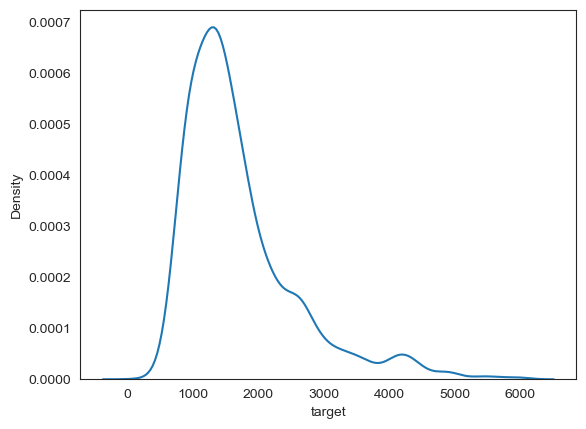

In [14]:
sns.kdeplot(data=data_num, x="target")

There must be outliers. Some of the properties can be offices or very big. I won´t consider those for the model, because there are not enough values.

<Axes: xlabel='m2', ylabel='Density'>

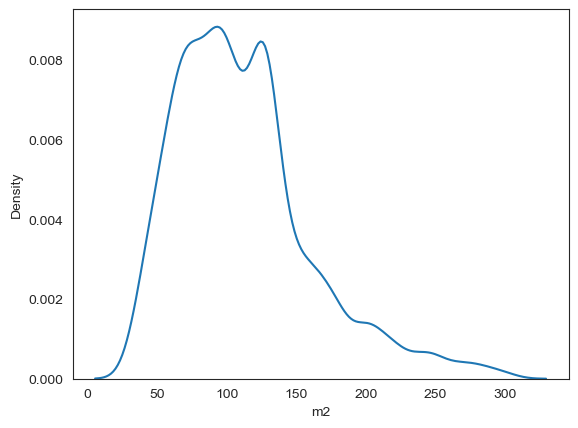

In [15]:
sns.kdeplot(data=data_num, x="m2")

In [16]:
test = data[(data['m2']>=35)]
test.shape

(3240, 21)

I have removed those rows where m2 > 300. Only 100 rows.

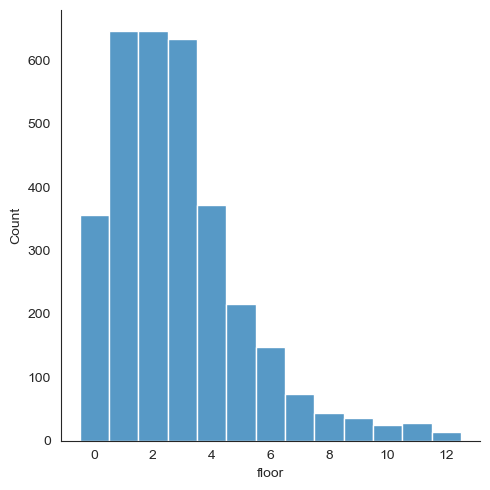

In [17]:
sns.displot(data=data_num, x="floor", discrete=True)

In [18]:
test = data[(data['floor']<=12)]
test.shape

(3240, 21)

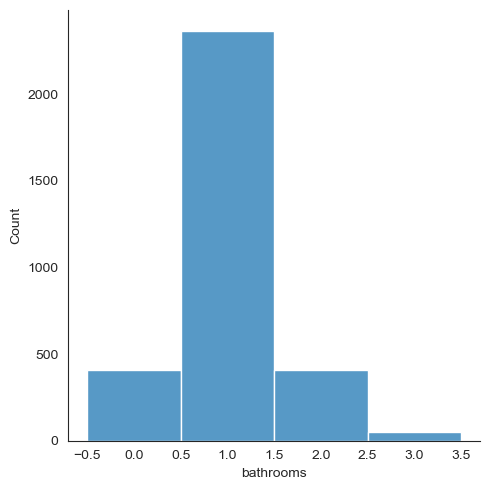

In [19]:
sns.displot(data=data_num, x="bathrooms", discrete=True)

In [20]:
test = data[(data['bathrooms']<=3)]
test.shape

(3240, 21)

I´ll only delete 10 rows if I remove bathrooms > than 3, which is not very common. So I´ll do it.

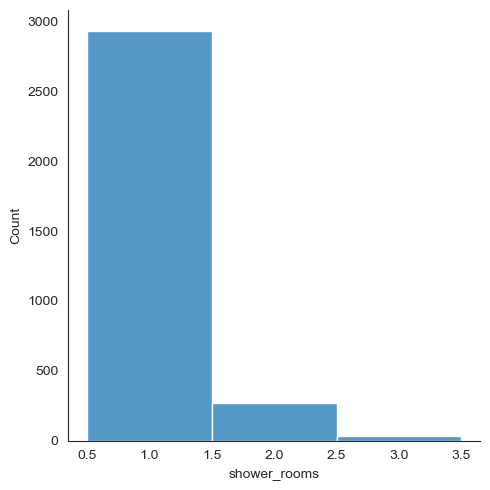

In [21]:
sns.displot(data=data_num, x="shower_rooms", discrete=True)

In [22]:
test = data[(data['shower_rooms']<=3)]
test.shape

(3240, 21)

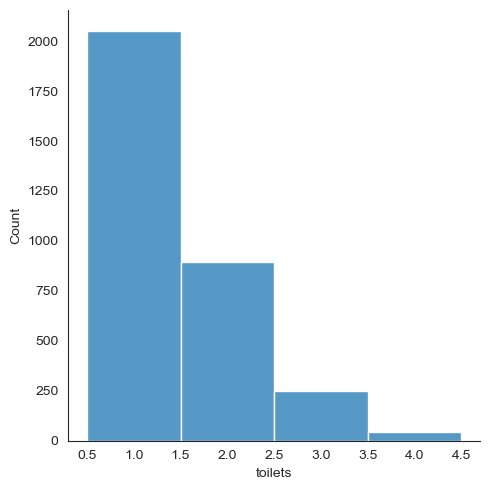

In [23]:
sns.displot(data=data_num, x="toilets", discrete=True)

In [24]:
test = data[(data['toilets']<=4)]
test.shape

(3240, 21)

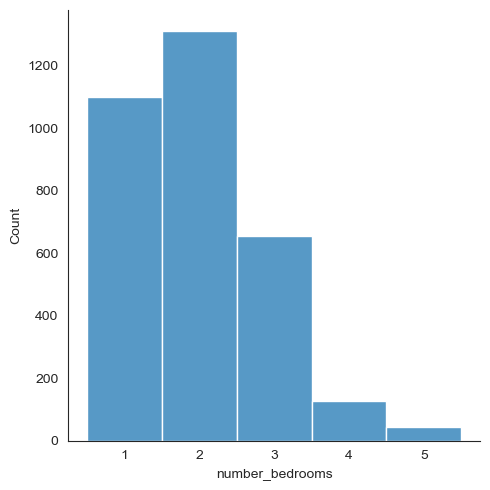

In [25]:
sns.displot(data=data_num, x="number_bedrooms", discrete=True)

In [26]:
test = data[(data['number_bedrooms']<=5)]
test.shape

(3240, 21)

<Axes: xlabel='primary_energy_consumption', ylabel='Density'>

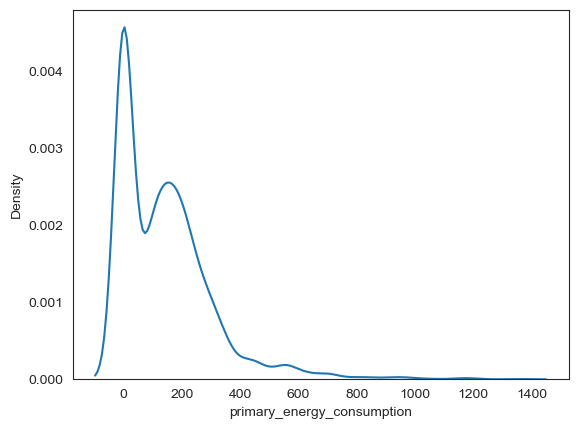

In [27]:
sns.kdeplot(data=data_num, x="primary_energy_consumption")

In [28]:
test = data[(data['primary_energy_consumption']<=1500)]
test.shape

(3240, 21)

<Axes: xlabel='co2_emission', ylabel='Density'>

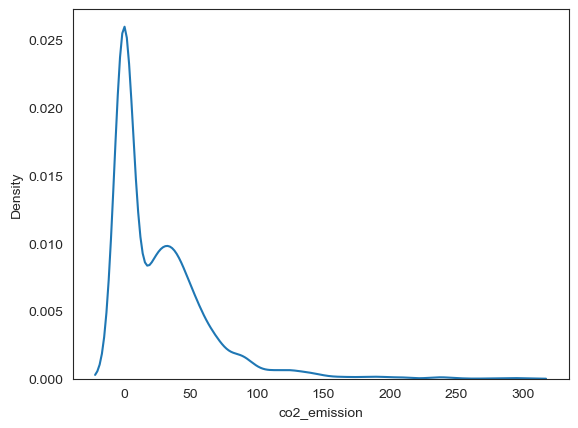

In [29]:
sns.kdeplot(data=data_num, x="co2_emission")

In [30]:
test = data[(data['co2_emission']<=300)]
test.shape

(3240, 21)

# Plots - Categorical

In [31]:
data_cat_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   municipality        3240 non-null   object
 1   street              3240 non-null   object
 2   listing_type        3240 non-null   object
 3   kitchen_type        3240 non-null   object
 4   building_condition  3240 non-null   object
 5   postcode            3240 non-null   object
 6   double_glazing      3240 non-null   object
 7   swimming_pool       3240 non-null   object
 8   dining_room         3240 non-null   object
 9   laundry_room        3240 non-null   object
 10  basement            3240 non-null   object
 11  air_conditioning    3240 non-null   object
 12  target              3240 non-null   int64 
dtypes: int64(1), object(12)
memory usage: 329.2+ KB


<Axes: xlabel='municipality', ylabel='target'>

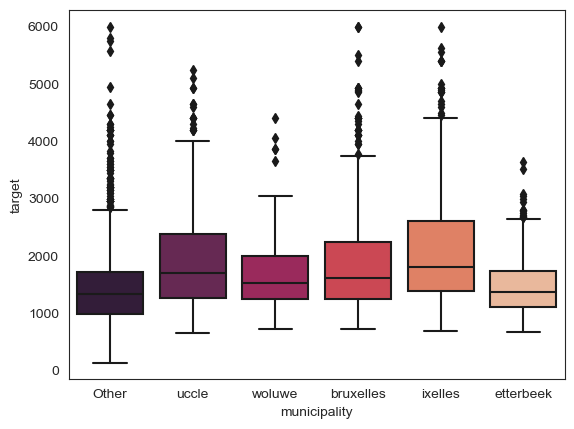

In [32]:
sns.boxplot(data=data_cat_target, x='municipality', y='target', palette='rocket')

In [33]:
test = data[(data['target']<=9000)]
test.shape

(3240, 21)

<Axes: xlabel='street', ylabel='target'>

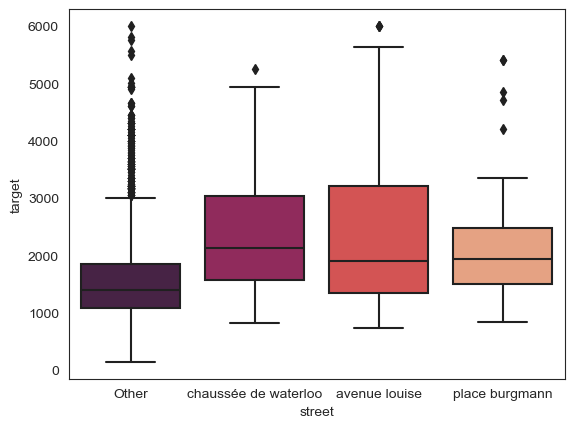

In [34]:
sns.boxplot(data_cat_target, x='street', y='target', palette='rocket')

<Axes: xlabel='listing_type', ylabel='target'>

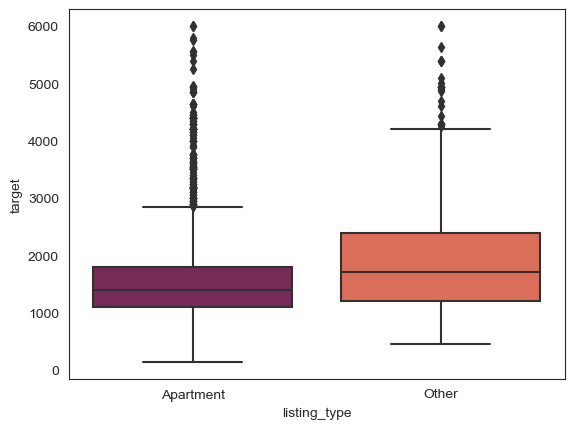

In [35]:
sns.boxplot(data_cat_target, x='listing_type', y='target', palette='rocket')

<Axes: xlabel='kitchen_type', ylabel='target'>

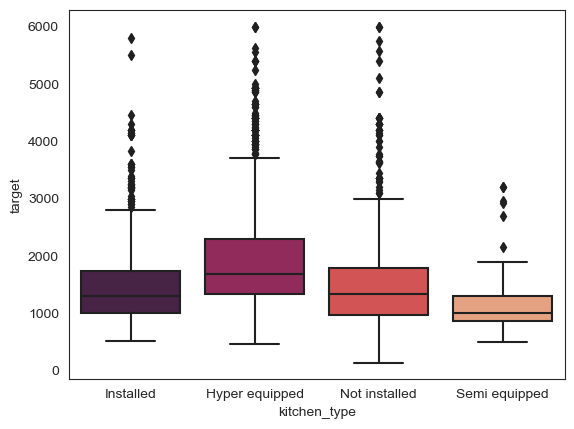

In [36]:
sns.boxplot(data_cat_target, x='kitchen_type', y='target', palette='rocket')

In [37]:
test = data[(data['target']<=8000)]
test.shape

(3240, 21)

<Axes: xlabel='building_condition', ylabel='target'>

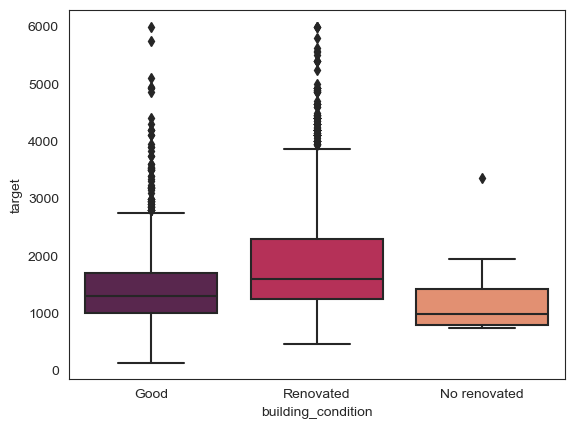

In [38]:
sns.boxplot(data_cat_target, x='building_condition', y='target', palette='rocket')

<Axes: xlabel='target', ylabel='postcode'>

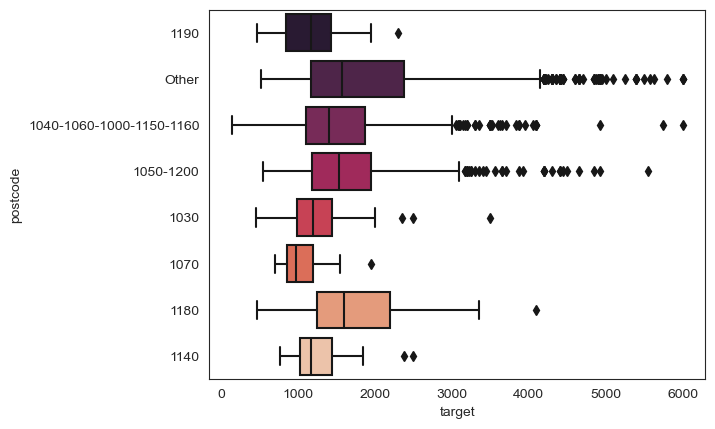

In [39]:
sns.boxplot(data_cat_target, y='postcode', x='target', palette='rocket')

In [40]:
test = data[(data['target']<=6000)]
test.shape

(3240, 21)

<Axes: xlabel='double_glazing', ylabel='target'>

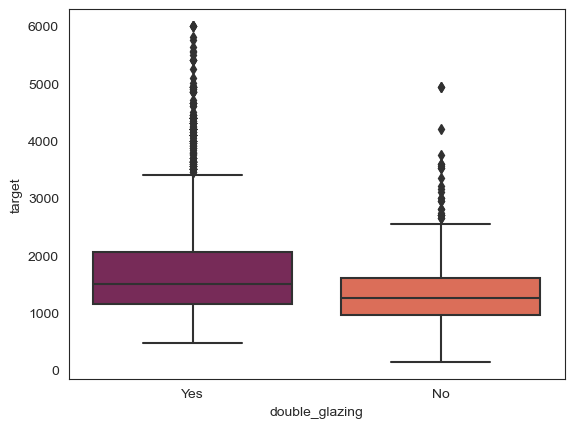

In [41]:
sns.boxplot(data_cat_target, x='double_glazing', y='target', palette='rocket')

<Axes: xlabel='swimming_pool', ylabel='target'>

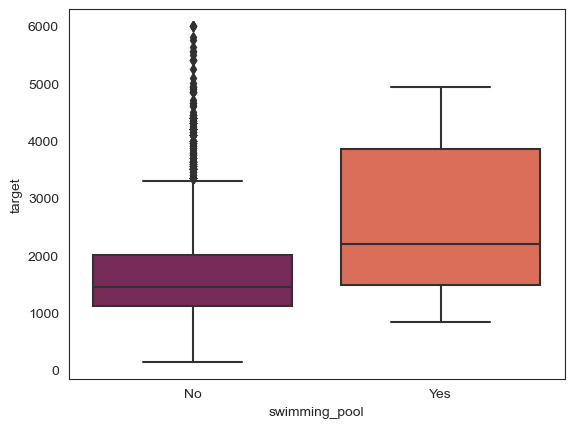

In [42]:
sns.boxplot(data_cat_target, x='swimming_pool', y='target', palette='rocket')

<Axes: xlabel='dining_room', ylabel='target'>

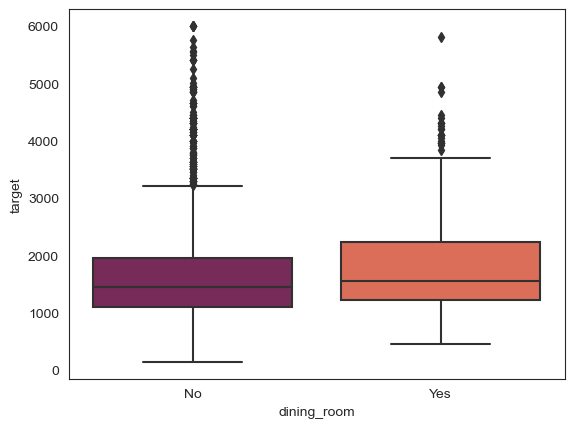

In [43]:
sns.boxplot(data_cat_target, x='dining_room', y='target', palette='rocket')

<Axes: xlabel='laundry_room', ylabel='target'>

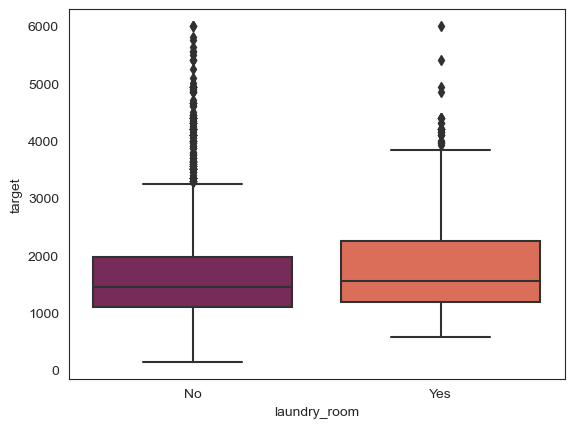

In [44]:
sns.boxplot(data_cat_target, x='laundry_room', y='target', palette='rocket')

<Axes: xlabel='basement', ylabel='target'>

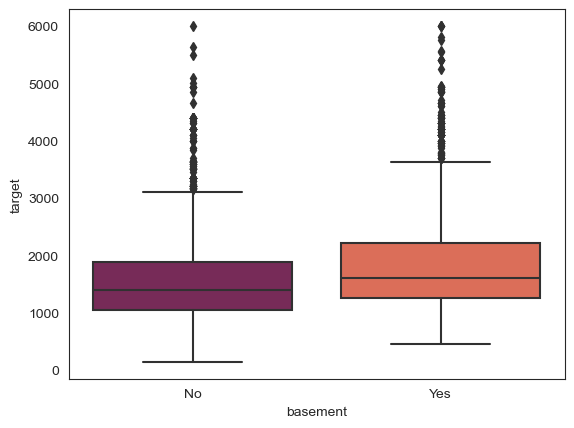

In [45]:
sns.boxplot(data_cat_target, x='basement', y='target', palette='rocket')

<Axes: xlabel='air_conditioning', ylabel='target'>

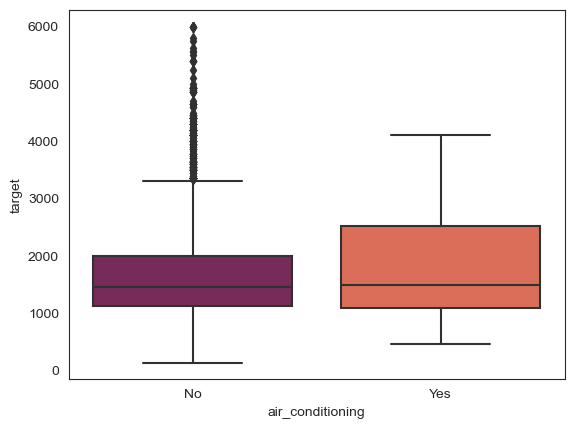

In [46]:
sns.boxplot(data_cat_target, x='air_conditioning', y='target', palette='rocket')

In [49]:
pd.crosstab(data_cat_target['street'], data_cat_target['postcode'])

postcode,1030,1040-1060-1000-1150-1160,1050-1200,1070,1140,1180,1190,Other
street,,,,,,,,
Other,115,732,445,45,54,211,47,1108
avenue louise,18,57,62,6,6,10,3,129
chaussée de waterloo,0,7,5,0,0,5,1,100
place burgmann,0,0,0,0,0,3,0,71
